In [1]:
############ Importing all the needed libraries ###############
# !pip install tensorflow
# !pip install -U imbalanced-learn
# !pip install sklearn
# !pip install imblearn
import random
# !pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn
import numpy as np
from sklearn.neighbors import DistanceMetric
import os
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
import tensorflow as tf
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks


In [2]:
path = os.getcwd()                #obtaining the path of the given directory using os module for making training 
# print(path)
df_t = pd.read_csv('test_data.csv')  # reading the test data from the csv file
x_test = df_t.values[:,2:]
x_test = x_test.reshape(400,50,50)/255.0 # Normalizing the feature between 0 and 1
df_t

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,1869,0,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2221,0,74,60,58,71,61,66,88,71,...,128,127,125,81,69,87,124,115,118,118
2,3971,0,211,210,209,208,207,207,207,207,...,200,202,148,151,120,90,111,141,110,111
3,1309,0,253,253,253,253,253,253,253,253,...,171,119,116,117,116,117,117,117,115,222
4,2442,0,134,96,77,110,75,110,144,120,...,44,55,50,40,45,48,46,48,49,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1036,0,240,235,231,224,199,160,138,139,...,104,131,106,113,141,153,182,168,123,82
396,3651,0,253,253,253,253,253,253,253,253,...,252,252,252,253,254,253,252,250,250,253
397,3000,0,66,67,67,69,70,71,72,72,...,36,43,70,83,82,61,90,98,103,103
398,2518,0,253,253,253,253,253,253,253,253,...,253,253,253,254,218,215,254,255,255,253


In [3]:
df = pd.read_csv('train_data.csv') # loading data using pandas to our data frame
ylable = df.values[:,1]            # extracting ylable 
xlable = df.values[:,2:]           # extracting xlable

resample= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))  # Over sampling the images of unbalanced data
xlable, ylable = resample.fit_resample(xlable, ylable)


X_train, X_val, y_train, y_val = train_test_split(xlable, ylable, test_size=0.2, stratify=ylable, random_state=0) #splitting the data into train and validation

# os.mkdir(path+'/training')   # run this for the first time to create training and validation directory
# os.mkdir(path+'/validation')

root_path_tr =  path + '/training'  #training directory
root_path_val = path + '/validation' #validation directory
  
classes = np.arange(1,31)

classes = [str(i) for i in classes]

# Run it when running for the first time

# for items in classes:                 # making subdirectory of all items according to the class they belong to
#     path = os.path.join(root_path_tr, items)
#     os.mkdir(path)
    
# for items in classes:
#     path = os.path.join(root_path_val, items)
#     os.mkdir(path)
    
# img = np.zeros((len(xlable), 50, 50))
############# visualizing the images ########################

for i in range(1,len(X_train)):             # saving the train and validation images in the subdirectories according to their classes
    data = X_train[i,:].T.astype(np.uint8)
    data = im.fromarray(data.reshape((50,50)))
    data.save(f'training/{y_train[i]}/Image{i}.jpeg')

for i in range(1,len(X_val)):
    data = X_val[i,:].astype(np.uint8)
    data = im.fromarray(data.reshape((50,50)))
    data.save(f'validation/{y_val[i]}/Image{i}.jpeg')


unique, counts = np.unique(ylable, return_counts=True) # rechecking that now the classes are balanced or not
result = np.column_stack((unique, counts)) 
counts

array([213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213,
       213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213,
       213, 213, 213, 213], dtype=int64)

In [4]:
print(X_train.shape) 
print(X_val.shape)

# Rescaling the train and validation data set features between 0 and 1
X_train = X_train/255.0
X_val = X_val/255.0

(5112, 2500)
(1278, 2500)


In [5]:
# train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale = 1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True)

# X_train = X_train.reshape((5112,50,50,1))
# X_val = X_val.reshape((1278,50,50,1))
# # train_datagen.fit(X_train)

# val_datagen = ImageDataGenerator(rescale=1./255)
# # val_datagen.fit(X_val)
# train_dataset = train_datagen.flow_from_directory('C:/Users/Admin/training',target_size=(50, 50),shuffle=True,
#                                                      color_mode='grayscale',batch_size=32,class_mode='categorical',seed=1)
# val_dataset = val_datagen.flow_from_directory('C:/Users/Admin/validation',target_size=(50, 50),shuffle=True,
#                                                      color_mode='grayscale',batch_size=32,class_mode='categorical',seed=1)

In [6]:
# print(y_train[7])
# data = X_val[7,:].astype(np.uint8)
# data = im.fromarray(data.reshape((50,50)))
# data
X_train = X_train.reshape((5112,50,50))    # reshaping the arrays in the form required for convolution
X_val = X_val.reshape((1278,50,50))

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 31)  # Creating one hot encoding of the class labels of train and validation
y_val = tf.keras.utils.to_categorical(y_val, 31)

In [8]:
# creating the Convolutional neural network model in the tensorflow

model = models.Sequential()
# tf.keras.initializers.HeNormal(seed=1)
model.add(layers.Conv2D(32,(3,3), activation='tanh', input_shape=(50, 50, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128,(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256,(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(512,(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128,activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(31,activation='softmax'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# using the callback class to stop the training early as soon as reqauired accuracy is being reached
ACCURACY_THRESHOLD = 0.91
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
        
callback = myCallback()

In [9]:
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=40, callbacks=[callback])                       

Epoch 1/40


C:\Users\Admin\anaconda3\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


160/160 [==============================] - 32s 196ms/step - loss: 3.4305 - accuracy: 0.0362 - val_loss: 3.4163 - val_accuracy: 0.0634
Epoch 2/40
160/160 [==============================] - 31s 191ms/step - loss: 3.3491 - accuracy: 0.0587 - val_loss: 3.3179 - val_accuracy: 0.0681
Epoch 3/40
160/160 [==============================] - 31s 193ms/step - loss: 3.1696 - accuracy: 0.1049 - val_loss: 2.9119 - val_accuracy: 0.1588
Epoch 4/40
160/160 [==============================] - 31s 192ms/step - loss: 2.7115 - accuracy: 0.1874 - val_loss: 2.2374 - val_accuracy: 0.3419
Epoch 5/40
160/160 [==============================] - 31s 193ms/step - loss: 2.2807 - accuracy: 0.3022 - val_loss: 1.6580 - val_accuracy: 0.4969
Epoch 6/40
160/160 [==============================] - 31s 194ms/step - loss: 1.8952 - accuracy: 0.3979 - val_loss: 1.2037 - val_accuracy: 0.6268
Epoch 7/40
160/160 [==============================] - 31s 192ms/step - loss: 1.5329 - accuracy: 0.5133 - val_loss: 0.8685 - val_accuracy: 0.7

In [10]:
model.summary()  # Summary of the CNN model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

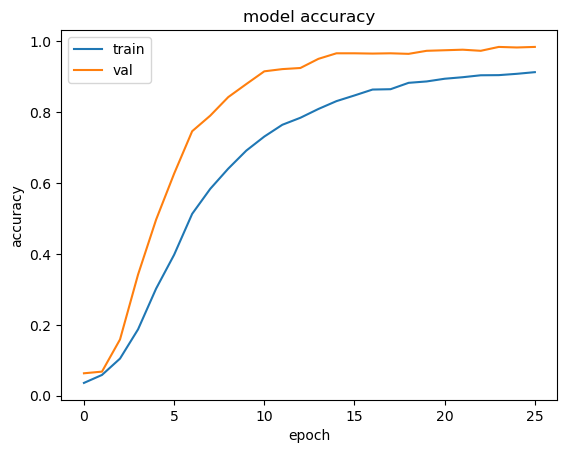

In [11]:
# plotting the train and validation accuracy with no of epochs
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
y_test_pred = model.predict(x_test)     #getting the prediction now on the test set

13/13 [==============================] - 1s 33ms/step


In [13]:
y_test_pred                             #seeing the prediction

array([[0.0000000e+00, 0.0000000e+00, 9.9999905e-01, ..., 1.2198784e-10,
        0.0000000e+00, 0.0000000e+00],
       [1.8637067e-31, 2.0432116e-19, 4.9849647e-18, ..., 9.9299756e-20,
        4.8742471e-10, 3.4851099e-13],
       [0.0000000e+00, 1.6003812e-25, 1.2278230e-32, ..., 3.6636209e-30,
        6.5044456e-11, 7.5625304e-16],
       ...,
       [4.3003877e-24, 3.6469550e-10, 1.0116232e-12, ..., 9.0128939e-11,
        5.6733936e-13, 2.1631916e-09],
       [4.1282095e-13, 2.9686837e-09, 2.1336449e-05, ..., 1.5201458e-07,
        1.9944518e-06, 7.9651809e-06],
       [0.0000000e+00, 6.9734365e-30, 2.0940875e-28, ..., 2.4670601e-29,
        1.3001934e-10, 6.9367602e-18]], dtype=float32)

In [14]:
len(y_test_pred)     

400

In [15]:
y_test_pred.shape    # shape of test set since in python index starts from 0 so ignoring the zero class

(400, 31)

In [16]:
for arr in y_test_pred:  #checking if any of prediction is predicting 0 class which means no class detected
    if np.argmax(arr)==0:
        print('Yes')

In [17]:
y = [np.argmax(i) for i in y_test_pred] # creating a list of predicted labels of each test set example

In [18]:
y     # visualizing the predicted test labels

[2,
 13,
 19,
 2,
 13,
 4,
 8,
 13,
 21,
 21,
 13,
 17,
 2,
 8,
 27,
 27,
 13,
 30,
 19,
 13,
 23,
 8,
 17,
 22,
 22,
 13,
 18,
 15,
 11,
 8,
 8,
 7,
 26,
 4,
 8,
 1,
 5,
 13,
 8,
 13,
 13,
 12,
 13,
 11,
 6,
 6,
 8,
 13,
 23,
 18,
 18,
 11,
 13,
 8,
 16,
 19,
 26,
 15,
 27,
 7,
 21,
 15,
 13,
 17,
 13,
 6,
 13,
 26,
 3,
 13,
 14,
 2,
 11,
 14,
 8,
 13,
 13,
 13,
 13,
 8,
 13,
 3,
 30,
 13,
 21,
 8,
 4,
 29,
 13,
 24,
 21,
 9,
 8,
 8,
 6,
 26,
 14,
 8,
 13,
 19,
 26,
 19,
 8,
 13,
 21,
 12,
 26,
 8,
 21,
 13,
 18,
 13,
 24,
 27,
 8,
 23,
 30,
 13,
 13,
 18,
 22,
 13,
 11,
 13,
 22,
 29,
 13,
 22,
 16,
 26,
 8,
 7,
 13,
 25,
 13,
 8,
 13,
 17,
 13,
 26,
 3,
 15,
 22,
 13,
 13,
 16,
 30,
 26,
 27,
 8,
 16,
 13,
 22,
 8,
 21,
 9,
 8,
 19,
 8,
 18,
 17,
 8,
 13,
 26,
 19,
 4,
 29,
 23,
 13,
 26,
 13,
 24,
 12,
 22,
 11,
 13,
 13,
 13,
 23,
 29,
 6,
 13,
 13,
 28,
 21,
 11,
 4,
 15,
 13,
 8,
 13,
 4,
 8,
 15,
 24,
 17,
 4,
 21,
 11,
 21,
 23,
 21,
 26,
 13,
 8,
 25,
 23,
 3,
 8,
 23,
 13,
 

In [19]:
df2_t = df_t['ID']  #creating a pandas series of test set ID
df2_t

0      1869
1      2221
2      3971
3      1309
4      2442
       ... 
395    1036
396    3651
397    3000
398    2518
399    1472
Name: ID, Length: 400, dtype: int64

In [20]:
df2_t = pd.DataFrame(df2_t) # creating a pandas dataframe of test set examples
df2_t

,ID
0,1869
1,2221
2,3971
3,1309
4,2442
...,...
395,1036
396,3651
397,3000
398,2518


In [21]:
df2_t['Class'] = y  # adding the corresponding labels of the ID in the test set data frame
df2_t

,ID,Class
0,1869,2
1,2221,13
2,3971,19
3,1309,2
4,2442,13
...,...,...
395,1036,22
396,3651,25
397,3000,8
398,2518,22


In [22]:
df2_t.to_csv(r'C:\Users\Admin\my_data220922_6.csv', index=False)   #saving the corresponding test set labels as csv file to measure accuracy on kaggle